# Predictive Analytics: Diagnosa Diabetes


# Business Understanding

Pengembangan model prediksi untuk diagnosis diabetes bisa membawa banyak manfaat buat berbagai pihak, mulai dari tenaga medis sampai pasien. Model ini bisa membantu deteksi dini diabetes, meningkatkan efektivitas pengelolaan penyakit, dan pada akhirnya memperbaiki kualitas hidup pasien. Misalnya, dengan prediksi yang akurat, tenaga medis bisa lebih tepat dalam mengambil keputusan klinis, sementara pasien bisa mulai mengambil langkah pencegahan lebih cepat untuk mengurangi risiko komplikasi di masa depan.


### Import Library yang Dibutuhkan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## 1. Import dan Read Data

In [ ]:
data1 = pd.read_csv('Diabetes_Predictive_Analytics_Data.csv', delimiter=';')
data2 = pd.read_csv('Diabetes_Data_Features.csv', delimiter=';')

In [ ]:
data1.head(5)

,"PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryDiabetes,GestationalDiabetes,PolycysticOvarySyndrome,PreviousPreDiabetes,Hypertension,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,AntihypertensiveMedications,Statins,AntidiabeticMedications,FrequentUrination,ExcessiveThirst,UnexplainedWeightLoss,FatigueLevels,BlurredVision,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge"
0,"6000,44,0,1,2,1,32.98528363147953,1,4.49936466..."
1,"6001,51,1,0,1,2,39.916764125880974,0,1.5789190..."
2,"6002,89,1,0,1,3,19.782251300100974,0,1.1773011..."
3,"6003,21,1,1,1,2,32.3768807915271,1,1.714621007..."
4,"6004,27,1,0,1,3,16.808600273405307,0,15.462548..."


In [ ]:
data2.head(5)

,"LifestyleScore,DiabetesRiskScore,TreatmentRecommendation,MedicationPriorityScore"
0,"5.699034002380556,47.268914948041456,3,49.2689..."
1,"15.659784275876788,47.24363462522475,3,52.2436..."
2,"14.842280000517892,28.865677002172077,2,33.865..."
3,"9.233281853188489,43.893525737960566,3,46.8935..."
4,"4.572607236904635,22.415821823046752,2,25.4158..."


# 2. Data Integration

Code berikut untuk menggabungkan data1 dan data2, namun agar mempercepat pada saat melihat outlier di blox plot gunakan file yang sudah disediakan.

In [ ]:
# Gabungin data berdasarkan PatientID
## merged_data = pd.merge(data1, data2, on="PatientID", how="inner")

# Simpen ke file baru
## merged_data.to_csv("Diabetes_Predictive_Analytics_Cleaned.csv", index=False)

## print("Data berhasil digabung dan disimpan di 'Diabetes_Predictive_Analytics_Cleaned.csv'")

In [ ]:
# Ini file hasil concat di atas
data = pd.read_csv('Diabetes_Predictive_Analytics_Cleaned.csv')

In [ ]:
data.head(5)

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge,LifestyleScore,DiabetesRiskScore,TreatmentRecommendation,MedicationPriorityScore
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,0,1.782724,4.486980,7.211349,1,Confidential,5.699034,47.268915,3,49.268915
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,1,3.381070,5.961705,5.024612,1,Confidential,15.659784,47.243635,3,52.243635
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,2.701019,8.950821,7.034944,0,Confidential,14.842280,28.865677,2,33.865677
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,1,1.409056,3.124769,4.717774,0,Confidential,9.233282,43.893526,3,46.893526
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,1.218452,6.977741,7.887940,0,Confidential,4.572607,22.415822,2,25.415822


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1879 non-null   int64  
 1   Age                            1879 non-null   int64  
 2   Gender                         1879 non-null   int64  
 3   Ethnicity                      1879 non-null   int64  
 4   SocioeconomicStatus            1879 non-null   int64  
 5   EducationLevel                 1879 non-null   int64  
 6   BMI                            1879 non-null   float64
 7   Smoking                        1879 non-null   int64  
 8   AlcoholConsumption             1879 non-null   float64
 9   PhysicalActivity               1879 non-null   float64
 10  DietQuality                    1879 non-null   float64
 11  SleepQuality                   1879 non-null   float64
 12  FamilyHistoryDiabetes          1879 non-null   i

In [ ]:
# Menampilkan statistik deskriptif data: menghitung dan menampilkan statistik deskriptif seperti count, mean, standard deviation, minimum, maximum, dan berbagai nilai kuartil.
data.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,LifestyleScore,DiabetesRiskScore,TreatmentRecommendation,MedicationPriorityScore
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.00000,1879.000000
mean,6939.000000,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.200790,...,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213,6.587303,36.162404,2.74827,39.477998
std,542.564896,20.515839,0.499977,1.047558,0.764940,0.885665,7.190975,0.449866,5.914216,2.857012,...,0.304361,0.400585,1.122632,2.910934,2.920908,0.490072,4.540558,7.691308,0.44142,7.846477
min,6000.000000,20.000000,0.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,...,0.000000,0.000000,0.004013,0.005384,0.000362,0.000000,-6.303555,19.539770,1.00000,20.721826
25%,6469.500000,38.000000,0.000000,0.000000,0.000000,1.000000,21.469981,0.000000,4.789725,2.751022,...,0.000000,0.000000,1.057801,2.420024,2.410113,0.000000,3.303962,30.035185,3.00000,33.473107
50%,6939.000000,55.000000,0.000000,0.000000,1.000000,2.000000,27.722988,0.000000,10.173865,5.249002,...,0.000000,0.000000,1.987170,4.843886,5.035208,0.000000,6.397653,36.204146,3.00000,39.437167
75%,7408.500000,73.000000,1.000000,1.000000,2.000000,2.000000,33.856460,1.000000,15.285359,7.671402,...,0.000000,0.000000,2.946019,7.513933,7.586865,1.000000,9.802787,42.331442,3.00000,45.515121
max,7878.000000,90.000000,1.000000,3.000000,2.000000,3.000000,39.998811,1.000000,19.996231,9.993893,...,1.000000,1.000000,3.999715,9.997165,9.993029,1.000000,18.477596,55.383052,3.00000,60.383052


In [ ]:
# Menampilkan jumlah nilai unik di setiap kolom
for col in data.columns:
    print(f"{col}: {data[col].nunique()}")

PatientID: 1879
Age: 71
Gender: 2
Ethnicity: 4
SocioeconomicStatus: 3
EducationLevel: 4
BMI: 1879
Smoking: 2
AlcoholConsumption: 1879
PhysicalActivity: 1879
DietQuality: 1879
SleepQuality: 1879
FamilyHistoryDiabetes: 2
GestationalDiabetes: 2
PolycysticOvarySyndrome: 2
PreviousPreDiabetes: 2
Hypertension: 2
SystolicBP: 90
DiastolicBP: 60
FastingBloodSugar: 1879
HbA1c: 1879
SerumCreatinine: 1879
BUNLevels: 1879
CholesterolTotal: 1879
CholesterolLDL: 1879
CholesterolHDL: 1879
CholesterolTriglycerides: 1879
AntihypertensiveMedications: 2
Statins: 2
AntidiabeticMedications: 2
FrequentUrination: 2
ExcessiveThirst: 2
UnexplainedWeightLoss: 2
FatigueLevels: 1879
BlurredVision: 2
SlowHealingSores: 2
TinglingHandsFeet: 2
QualityOfLifeScore: 1879
HeavyMetalsExposure: 2
OccupationalExposureChemicals: 2
WaterQuality: 2
MedicalCheckupsFrequency: 1879
MedicationAdherence: 1879
HealthLiteracy: 1879
Diagnosis: 2
DoctorInCharge: 1
LifestyleScore: 1879
DiabetesRiskScore: 1879
TreatmentRecommendation: 3
M

In [ ]:
data = data.drop(['PatientID', 'DoctorInCharge'], axis=1)
data

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,LifestyleScore,DiabetesRiskScore,TreatmentRecommendation,MedicationPriorityScore
0,44,0,1,2,1,32.985284,1,4.499365,2.443385,4.898831,...,0,0,1.782724,4.486980,7.211349,1,5.699034,47.268915,3,49.268915
1,51,1,0,1,2,39.916764,0,1.578919,8.301264,8.941093,...,0,1,3.381070,5.961705,5.024612,1,15.659784,47.243635,3,52.243635
2,89,1,0,1,3,19.782251,0,1.177301,6.103395,7.722543,...,0,0,2.701019,8.950821,7.034944,0,14.842280,28.865677,2,33.865677
3,21,1,1,1,2,32.376881,1,1.714621,8.645465,4.804044,...,0,1,1.409056,3.124769,4.717774,0,9.233282,43.893526,3,46.893526
4,27,1,0,1,3,16.808600,0,15.462549,4.629383,2.532756,...,0,0,1.218452,6.977741,7.887940,0,4.572607,22.415822,2,25.415822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,37,0,0,2,2,20.811137,0,10.946207,3.217636,8.338196,...,0,1,3.154225,3.849584,8.805087,0,11.568523,28.731859,2,28.731859
1875,80,1,0,2,2,27.694312,0,16.067905,7.107335,3.034771,...,0,1,0.424893,5.217465,0.915878,1,-0.526492,40.026709,3,43.026709
1876,38,1,0,0,2,35.640824,0,4.865124,9.881212,2.657002,...,0,0,0.553757,3.377744,3.017481,1,5.037050,40.548032,3,42.548032
1877,43,0,1,2,0,32.423016,0,6.362936,4.750079,8.736024,...,0,0,1.132470,0.009250,4.914556,1,12.571947,46.243629,3,51.243629


In [ ]:
numerical_features = [
    'Age',
    'BMI',
    'AlcoholConsumption',
    'PhysicalActivity',
    'DietQuality',
    'SleepQuality',
    'SystolicBP',
    'DiastolicBP',
    'FastingBloodSugar',
    'HbA1c',
    'SerumCreatinine',
    'BUNLevels',
    'CholesterolTotal',
    'CholesterolLDL',
    'CholesterolHDL',
    'CholesterolTriglycerides',
    'FatigueLevels',
    'QualityOfLifeScore',
    'MedicalCheckupsFrequency',
    'MedicationAdherence',
    'HealthLiteracy',

    # yg ditambahkan
    'LifestyleScore',
    'DiabetesRiskScore',
    'MedicationPriorityScore'
]

categorical_features = [
    'Gender',
    'Ethnicity',
    'SocioeconomicStatus',
    'EducationLevel',
    'Smoking',
    'FamilyHistoryDiabetes',
    'GestationalDiabetes',
    'PolycysticOvarySyndrome',
    'PreviousPreDiabetes',
    'Hypertension',
    'AntihypertensiveMedications',
    'Statins',
    'AntidiabeticMedications',
    'FrequentUrination',
    'ExcessiveThirst',
    'UnexplainedWeightLoss',
    'BlurredVision',
    'SlowHealingSores',
    'TinglingHandsFeet',
    'HeavyMetalsExposure',
    'OccupationalExposureChemicals',
    'WaterQuality',
    'Diagnosis',

    # yg ditambahkan
    'TreatmentRecommendation'
]

In [ ]:
non_used = ['Diagnosis']
# Mengecualikan kolom non_used dari numerical_features
numerical_features = [col for col in numerical_features if col not in non_used]

# Pilih kolom yang ada di numerical_features dari data
num_dist = data[numerical_features]

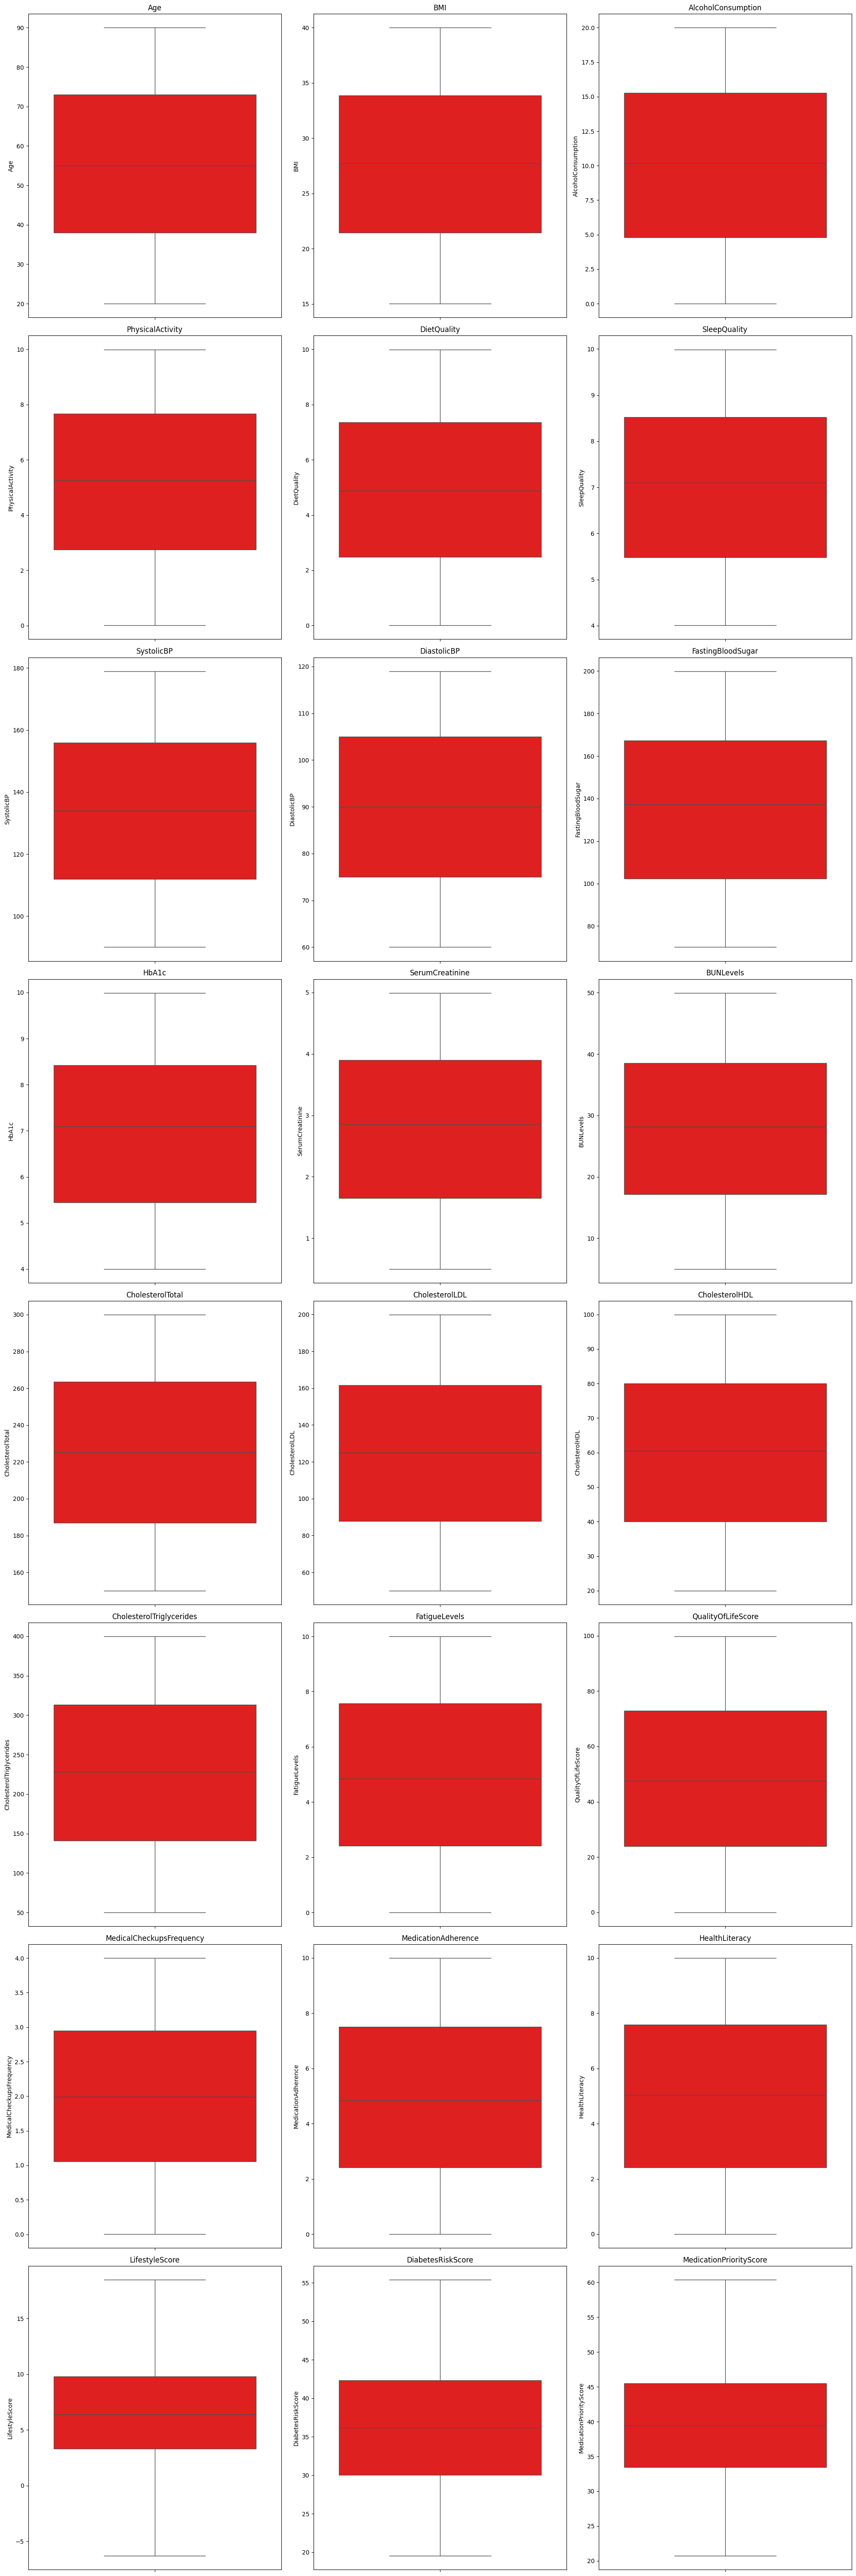

In [ ]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(20, 60))

# Grid 8 baris x 3 kolom
for i in range(24):
    plt.subplot(8, 3, i + 1)
    sns.boxplot(y=num_dist.iloc[:, i], color='red')  # Membuat boxplot untuk setiap kolom
    plt.title(num_dist.columns[i])  # Menambahkan judul berdasarkan nama kolom
    plt.tight_layout()

plt.show()

tidak ada fitur yang outliers

In [ ]:
# Melihat data duplicated dan missing value

print("Total Data Duplicated:", data.duplicated().sum())
print("")
print("Table Missing Value")
data.isna().sum() #Lihat apakah ada missing value

Total Data Duplicated: 0

Table Missing Value


,0
Age,0
Gender,0
Ethnicity,0
SocioeconomicStatus,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


data sudah tidak ada yang duplicate dan tidak ada missing values

## Exploratory Data Analysis - Deskripsi Variabel

## Univariate Analysis

### Numerical Features

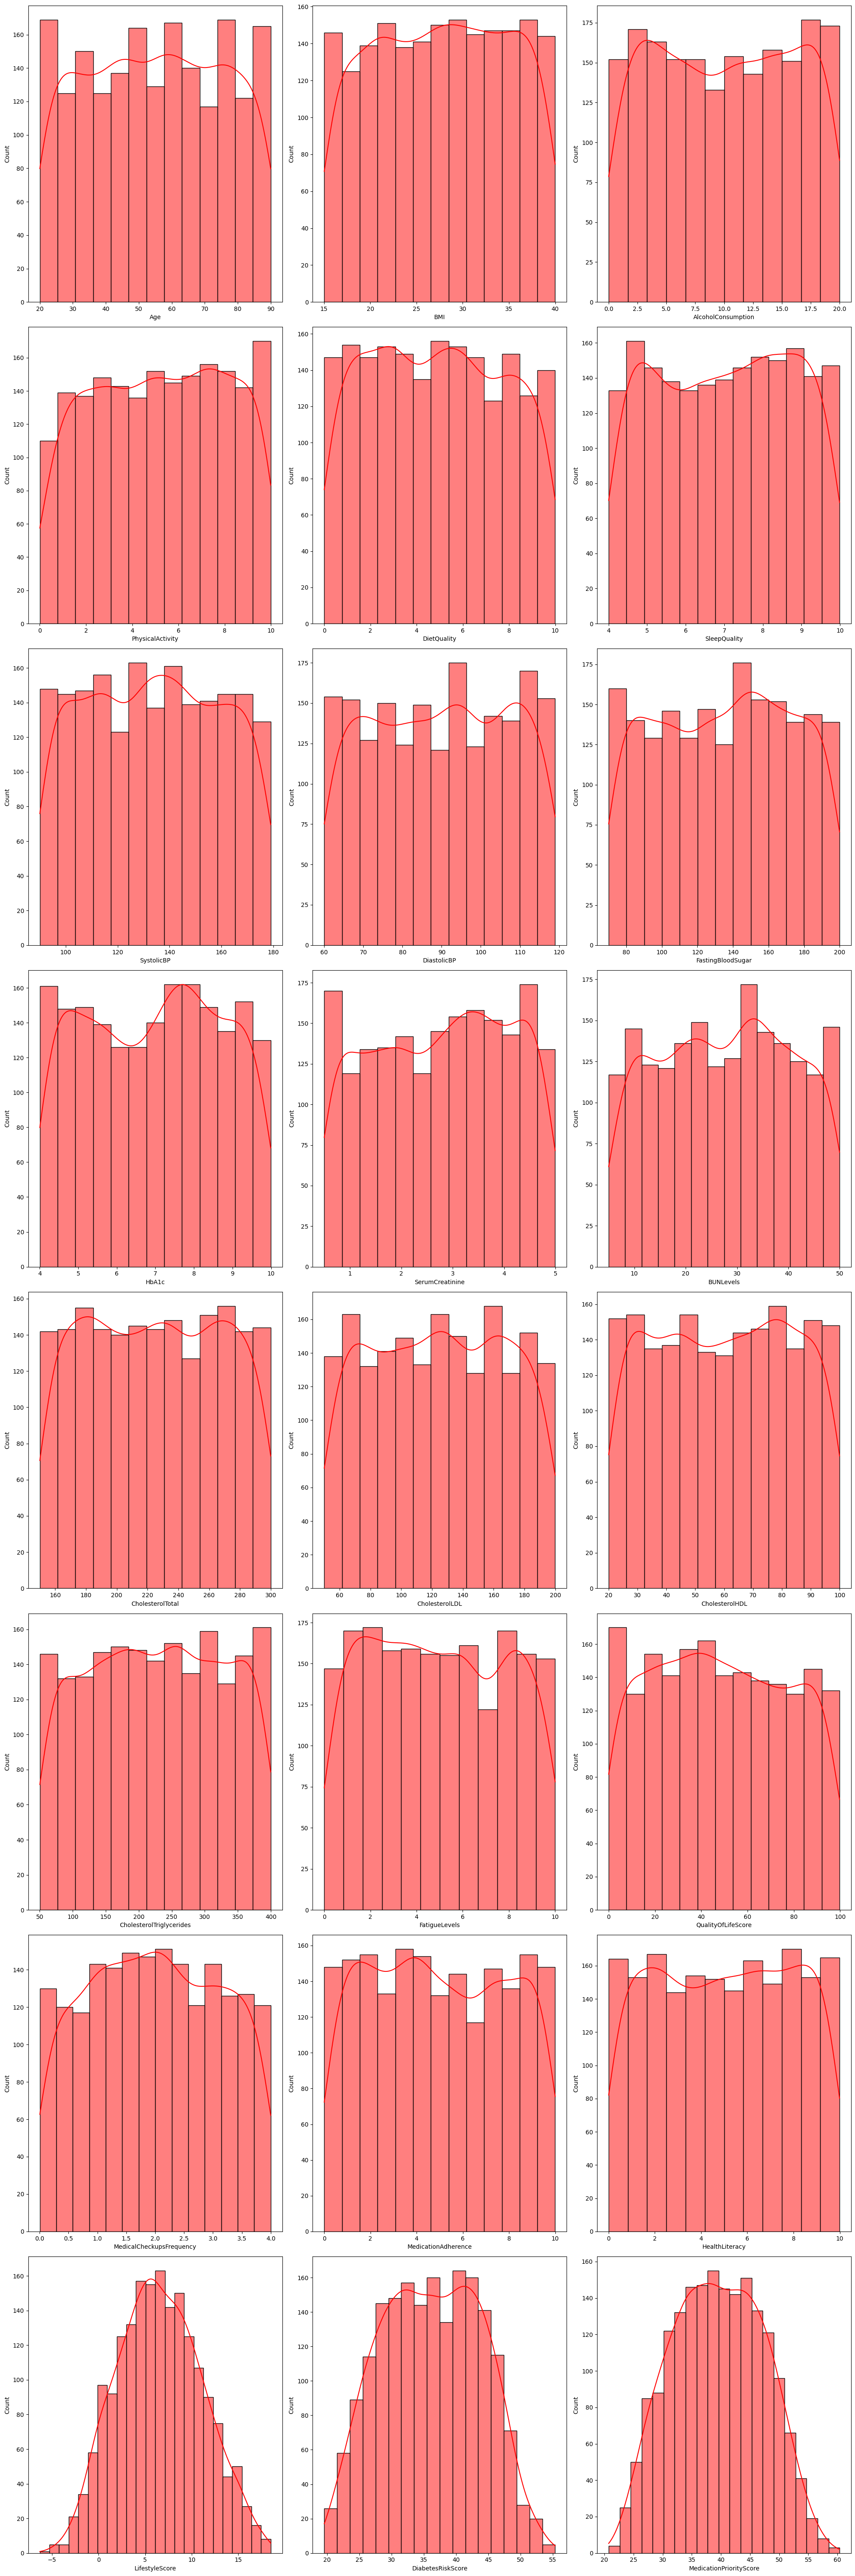

In [ ]:
plt.figure(figsize=(20, 60))

for i in range(24):
    plt.subplot(8, 3, i + 1)
    sns.histplot(num_dist.iloc[:, i], color='red', kde=True)
    plt.tight_layout()

plt.show() #untuk lihat distribusi data numerical featues

**Bentuk Distribusi**

  * Baris atas: cenderung merata atau sedikit naik‐turun (uniform–unimodal ringan).
  * Baris terbawah: lebih jelas membentuk kurva lonceng (mendekati normal), dengan puncak di tengah dan ekor menurun ke dua sisi.

**Skewness dan Persebaran**

  * Histogram mirip lonceng: skewness kecil (hampir simetris).
  * Histogram mendatar/acak: belum tentu normal, bisa mendekati uniform atau punya beberapa puncak kecil.
  * Ada yang punya puncak di sisi kiri/kanan, menunjukkan sedikit skewness.

### Categorical Features

In [ ]:
categorical_features = [col for col in categorical_features if col not in non_used]
categorical_dist = data[categorical_features]

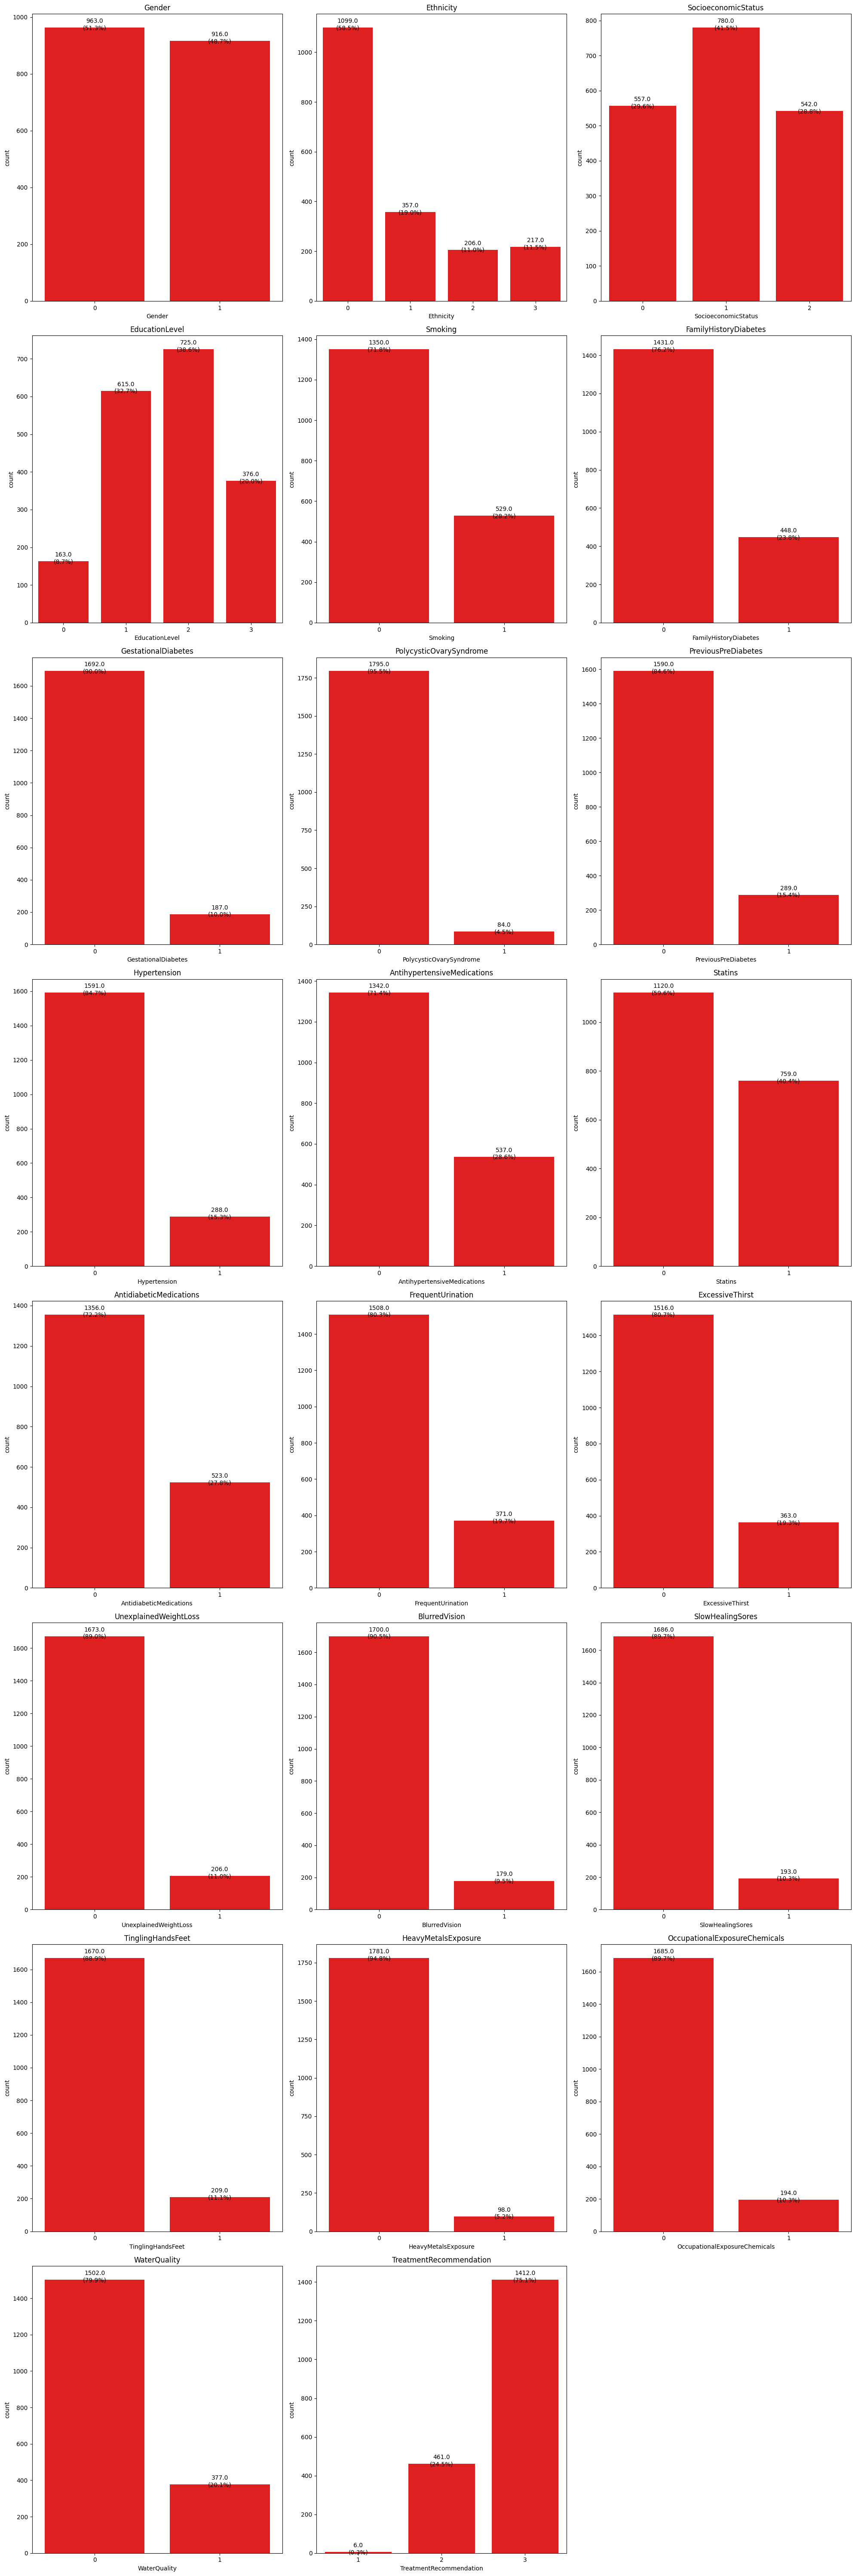

In [ ]:
plt.figure(figsize=(20, 60))

for i in range(categorical_dist.shape[1]):
    plt.subplot(8, 3, i + 1)

    # Membuat countplot untuk setiap kolom
    ax = sns.countplot(x=categorical_dist.iloc[:, i], color='red')

    # Menambahkan jumlah sampel dan persentasenya
    total = len(categorical_dist)
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        ax.annotate(f'{count}\n({percentage})',
                    (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

    # Menambahkan judul berdasarkan nama kolom
    plt.title(categorical_dist.columns[i])

    plt.tight_layout()

plt.show()

1. **Gender**  
   - Terdiri dari dua kategori (0 dan 1) dengan distribusi relatif seimbang; kategori 0 sedikit lebih banyak.

2. **Ethnicity**  
   - Empat kategori (0, 1, 2, 3) di mana kategori 0 mendominasi jumlah terbanyak, sedangkan kategori lain berjumlah lebih kecil.

3. **SocioeconomicStatus**  
   - Tiga kategori (0, 1, 2) yang relatif seimbang (masing‐masing di kisaran 500–600 observasi).

4. **EducationLevel**  
   - Empat kategori (mungkin 1, 2, 3, 4). Ada satu kategori yang paling tinggi, sisanya agak merata tetapi lebih rendah.

5. **Smoking**  
   - Mayoritas berada di kategori “0” (tidak merokok), sedangkan “1” (merokok) lebih sedikit.

6. **FamilyHistoryOfDiabetes**  
   - Setidaknya tiga kategori (0, 1, 2); kategori 2 tampak paling banyak, diikuti kategori 0 dan 1.

7. **GestationalDiabetes**  
   - Hanya dua kategori (0: tidak ada riwayat, 1: ada riwayat), dan mayoritas berada di kategori 0.

8. **PolycysticOvarySyndrome**  
   - Juga dua kategori (0, 1), dengan dominasi besar di kategori 0.

9. **PreviousPrediabetes**  
   - Dua kategori (0, 1), dengan 0 jauh lebih banyak daripada 1.

10. **Hypertension**  
    - Dua kategori (0, 1), mayoritas tidak hipertensi (0).

11. **AntihypertensiveMedications**  
    - Mayoritas kategori 0 (tidak menggunakan), kategori 1 (menggunakan) relatif kecil.

12. **Statins**  
    - Kategori 0 mendominasi (tidak pakai statin), kategori 1 lebih sedikit.

13. **WeightLossPrograms** (atau semacam “WeightReduction”)
    - Lebih banyak yang tidak mengikuti program (0) dibanding yang mengikuti (1).

14. **RheumatologicDiseases** (atau sejenisnya)
    - Kategori 0 mendominasi, 1 lebih rendah.

15. **Inflammation**
    - Hampir sama polanya, 0 mendominasi, 1 sedikit.

16. **SkinTanningScore** (kemungkinan 0, 1)
    - Kembali mayoritas di 0, kategori 1 lebih sedikit.

17. **WaterQuality**
    - Dua kategori, mayoritas 0 (mungkin “baik”), 1 relatif kecil.

18. **HeavyMetalsExposure**
    - Kategori 0 paling banyak, 1 lebih sedikit.

19. **OccupationalExposureToChemicals**
    - Dominasi di 0 (tidak terpapar), 1 jauh lebih kecil.

20. **TreatmentRecommendation**  
    - Terdapat beberapa kategori (misalnya 1, 2, 3). Satu kategori (3) tampak paling tinggi, sisanya lebih rendah.


## Multivariate Analysis

### Categorical Features

In [ ]:
categorical_features = [col for col in categorical_features if col not in non_used]
categorical_dist = data[categorical_features]

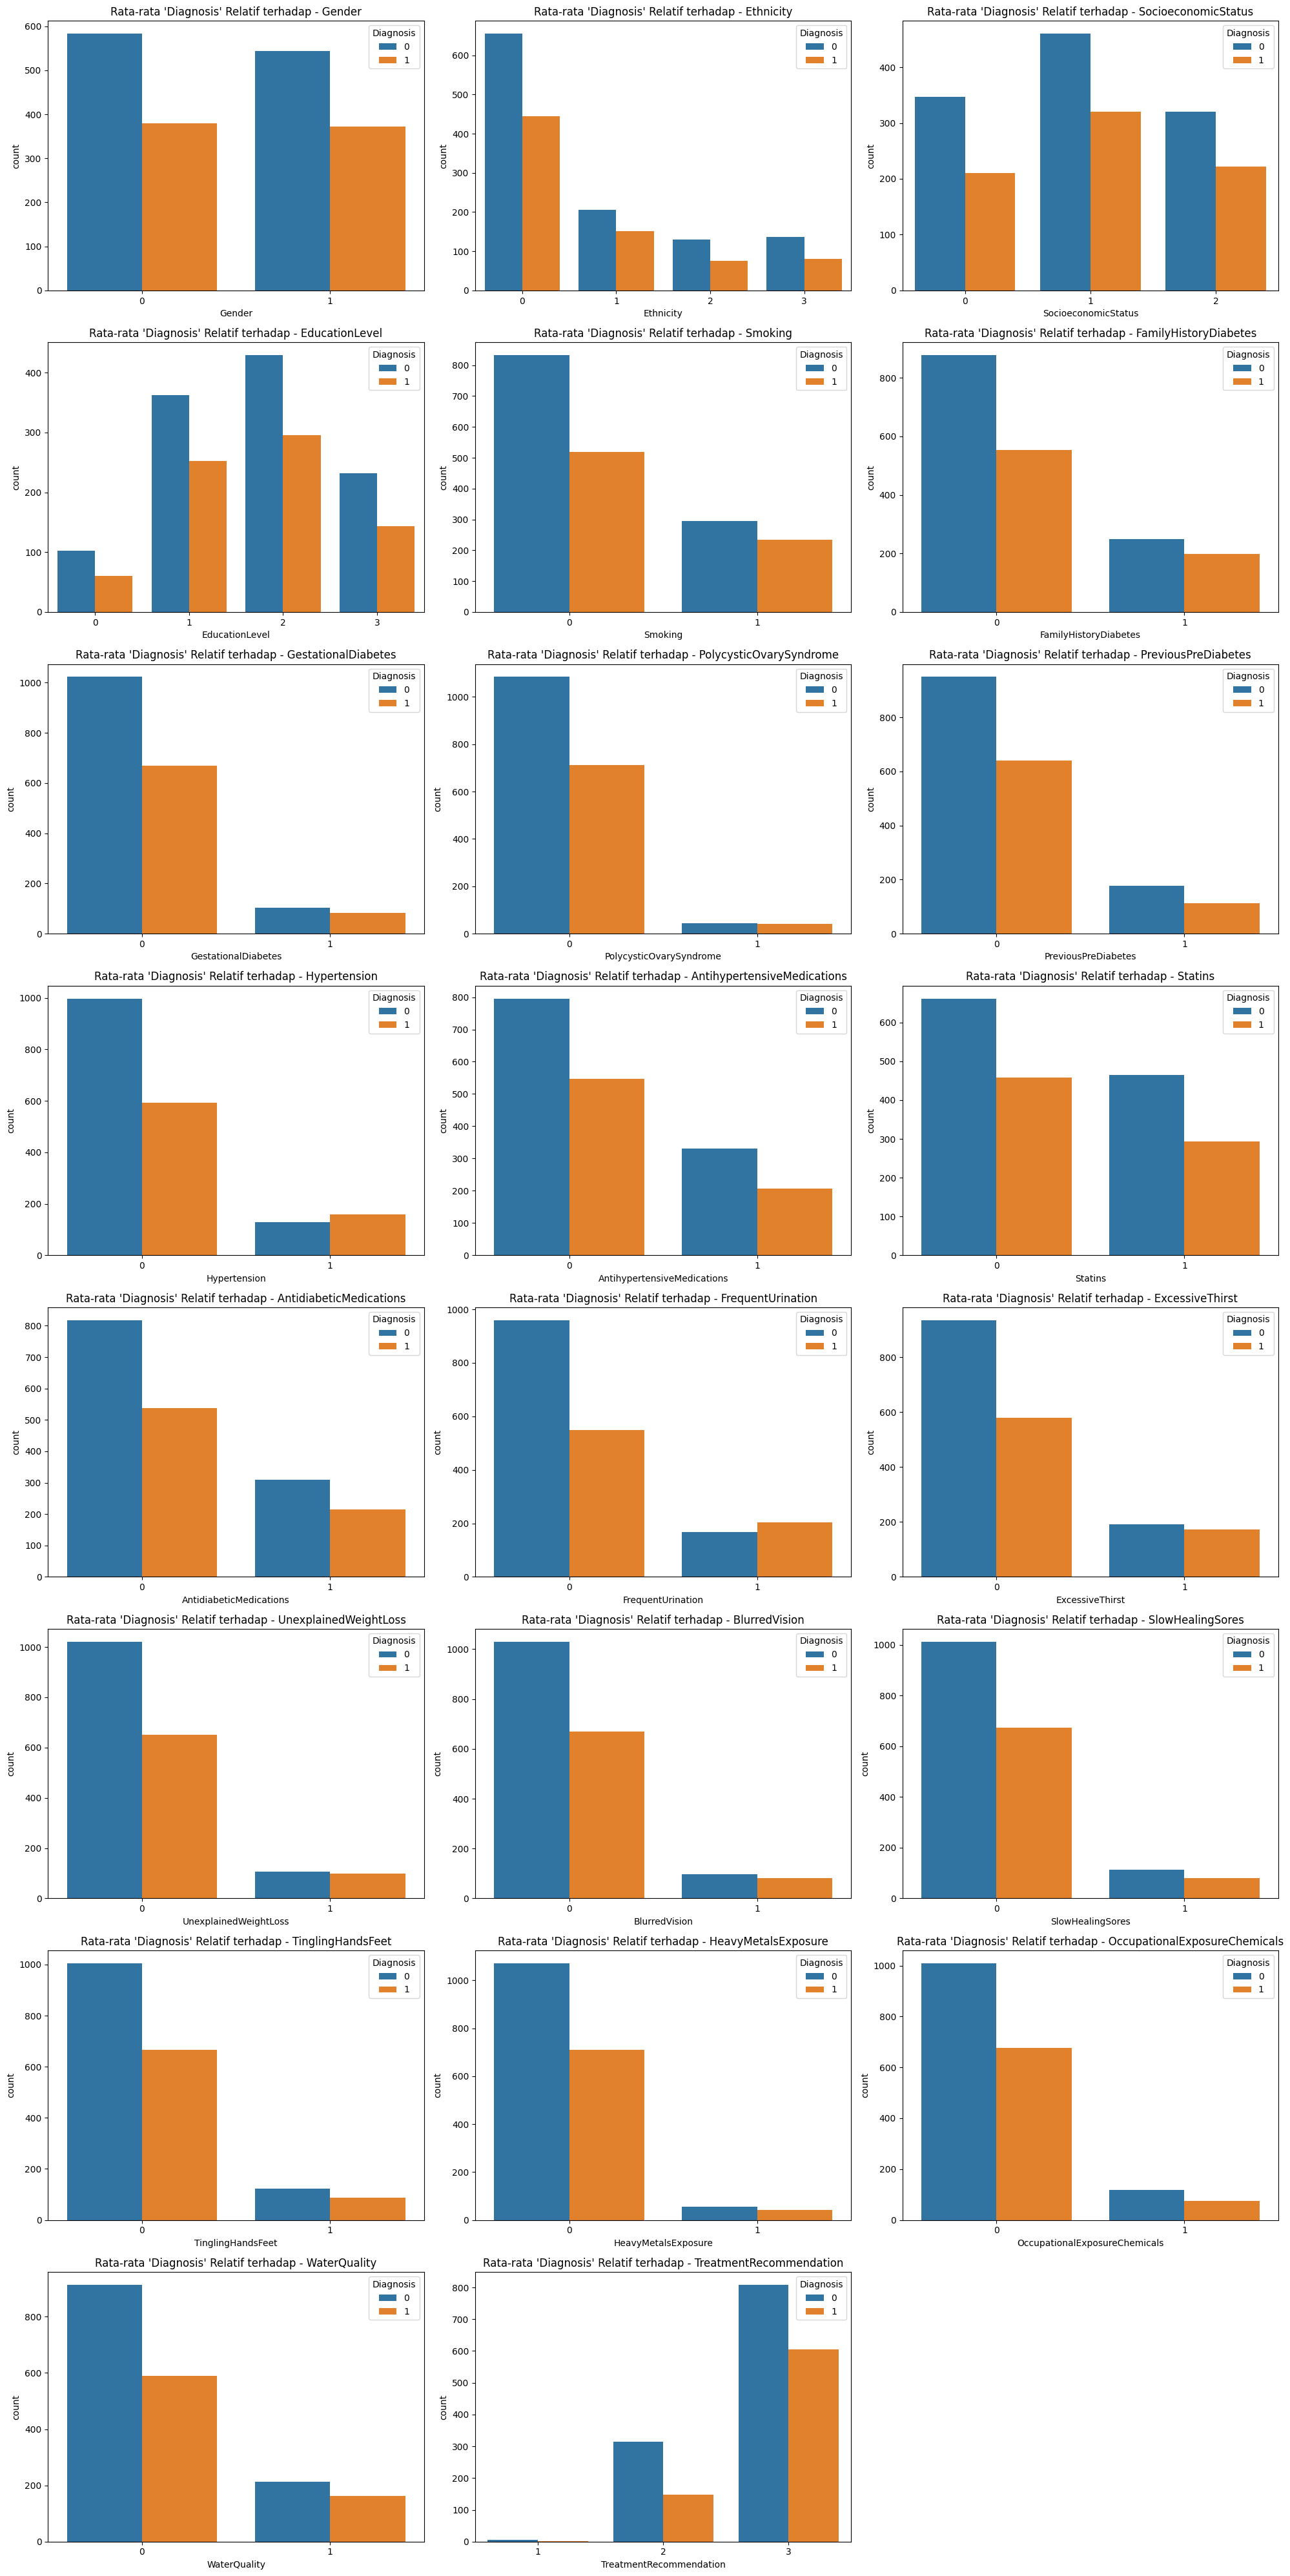

In [ ]:
# Tentukan grid layout
fig, axes = plt.subplots(8, 3, figsize=(20, 40))
axes = axes.flatten()

# Iterasi dan plot
for i, col in enumerate(categorical_dist):
    sns.countplot(x=col, hue='Diagnosis', data=data, ax=axes[i])
    axes[i].set_title(f"Rata-rata 'Diagnosis' Relatif terhadap - {col}")
    axes[i].legend(title='Diagnosis')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

 **Diagnosis=0** (tidak terdiagnosis) dan **Diagnosis=1** (terdiagnosis):

1. **Gender**  
   - Terbagi menjadi kategori 0 dan 1. Terlihat bahwa keduanya memiliki porsi diagnosis=0 lebih banyak dibanding diagnosis=1, namun ada perbedaan jumlah antara gender 0 dan 1.

2. **Ethnicity**  
   - Memiliki beberapa kategori (0, 1, 2, 3). Kategori 0 dominan untuk kedua diagnosis, namun distribusi kategori lainnya juga berbeda antara diagnosis=0 dan diagnosis=1.

3. **SocioeconomicStatus**  
   - Terdiri dari kategori 0, 1, 2. Masing‐masing kategori tampak cukup berimbang di diagnosis=0, sementara diagnosis=1 pun tersebar tetapi dengan pola yang sedikit berbeda.

4. **EducationLevel**  
   - Memiliki 4 kategori, tampak ada perbedaan jumlah cukup jelas di setiap kategori antara diagnosis=0 dan diagnosis=1. Beberapa kategori lebih banyak di diagnosis=0, yang lain relatif berimbang.

5. **Smoking**  
   - Kategori 0 (tidak merokok) dan 1 (merokok). Nampak bahwa diagnosis=0 masih mendominasi, tetapi perbandingan dengan diagnosis=1 cukup signifikan untuk perokok.

6. **FamilyHistoryOfDiabetes**  
   - Kategori 0, 1, 2. Kategori 2 (mungkin “keluarga inti”) punya frekuensi cukup tinggi pada diagnosis=1, mengindikasikan korelasi dengan diabetes.

7. **GestationalDiabetes**  
   - Kategori 0, 1. Sebagian besar (0) tidak memiliki riwayat, tetapi diagnosis=1 juga naik untuk yang punya riwayat (1).

8. **PolycysticOvarySyndrome**  
   - Kategori 0, 1. Mayoritas 0 di kedua diagnosis, namun untuk kategori 1 tampak lebih banyak di diagnosis=1 (relatif terhadap totalnya).

9. **PreviousPrediabetes**  
   - Kategori 0, 1. Mereka yang pernah prediabetes (1) memiliki porsi diagnosis=1 lumayan besar.

10. **Hypertension / AntihypertensiveMedications**  
    - Pada keduanya, kategori 1 punya proporsi diagnosis=1 lebih tinggi. Menunjukkan hubungan hipertensi / penggunaan obat antihipertensi dengan diagnosis.

11. **Statins**  
    - Kategori 0, 1. Mayoritas tidak menggunakan statin, tetapi proporsi diagnosis=1 lebih terlihat bagi pengguna statin.

12. **AntidiabeticMedications**  
    - Nampak perbedaan mencolok: yang menggunakan obat antidiabetes (1) lebih sering berada pada diagnosis=1.

13. **FrequentUrination / ExcessiveThirst / UnexplainedWeightLoss / BlurredVision / TinglingHandsFeet**  
    - Gejala‐gejala klasik diabetes (kategori 1) jelas lebih tinggi frekuensinya di kelompok diagnosis=1.

14. **HeavyMetalsExposure / OccupationalExposureChemicals / WaterQuality**  
    - Kategori 1 (terpapar / buruk) tetap lebih sedikit secara total, tapi terlihat porsi diagnosis=1 agak meningkat dibanding diagnosis=0.

15. **TreatmentRecommendation**  
    - Memiliki beberapa kategori (misal 1, 2, 3). Umumnya kategori 3 (mungkin “terapi lebih intens”) lebih banyak pada diagnosis=1, sedangkan diagnosis=0 dominan di kategori lebih rendah.

Secara keseluruhan, **setiap atribut** menunjukkan perbedaan distribusi antara **Diagnosis=0** dan **Diagnosis=1**. Beberapa variabel (riwayat penyakit, gejala khas, paparan risiko) menunjukkan **hubungan lebih kuat** dengan diagnosis=1 (terdiagnosis).

### Categorical Features

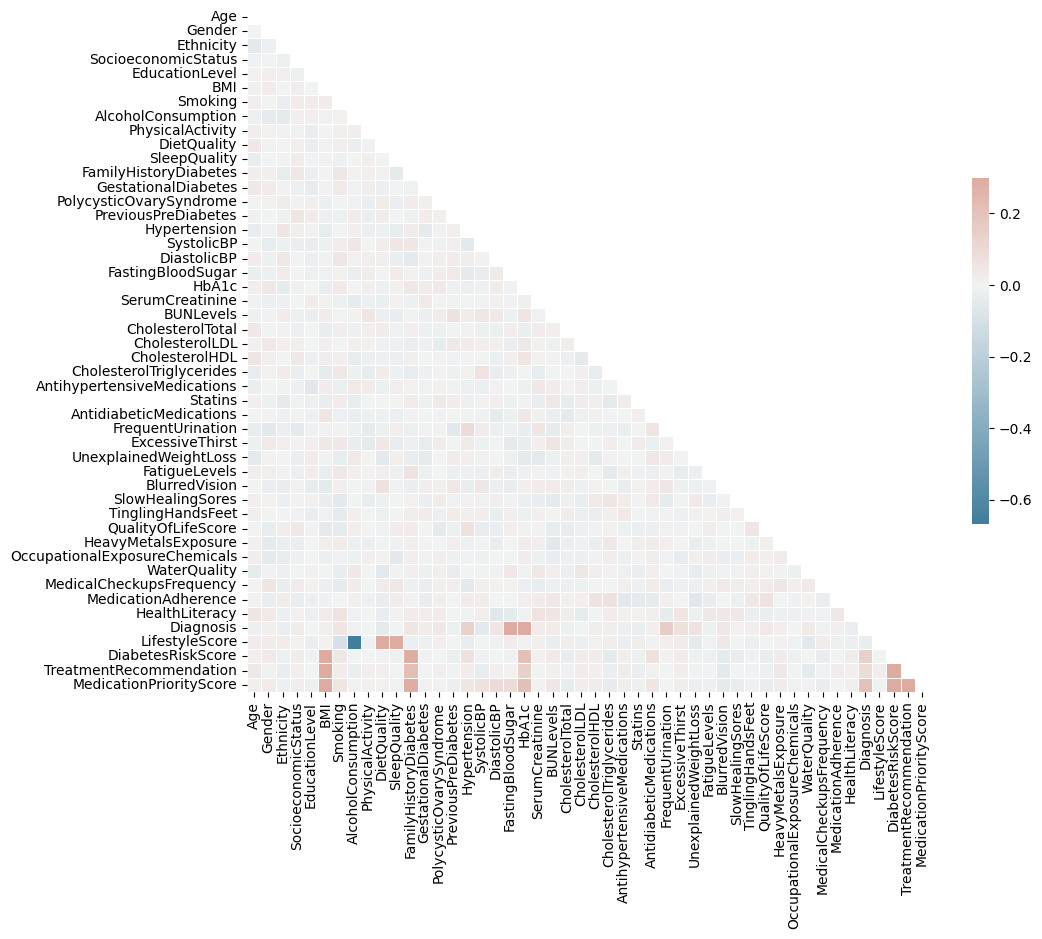

In [ ]:
# Compute the correlation matrix, but only for numeric columns
corr = data.select_dtypes(include=np.number).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [ ]:
# Compute the correlation matrix, but only for numeric columns
corr = data.select_dtypes(include=np.number).corr()

# Tampilkan tabel korelasi sebagai DataFrame
corr_table = pd.DataFrame(corr)

# Display tabel korelasi
corr_table


,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,LifestyleScore,DiabetesRiskScore,TreatmentRecommendation,MedicationPriorityScore
Age,1.000000,-0.000856,-0.049707,-0.007782,0.005520,0.006928,0.010858,-0.017781,0.017811,0.036613,...,0.019327,-0.039539,-0.003905,0.001905,0.047514,-0.016864,0.023818,0.012398,0.036007,0.010914
Gender,-0.000856,1.000000,-0.010411,-0.000957,0.014952,0.020455,0.000275,-0.038466,0.006692,0.002963,...,-0.040498,0.003230,0.049901,-0.031806,0.032218,0.011746,0.024696,0.031604,-0.008241,0.028796
Ethnicity,-0.049707,-0.010411,1.000000,-0.017719,0.012042,-0.005440,-0.022346,-0.042909,0.002575,-0.000708,...,-0.034420,-0.016378,-0.025778,0.028130,-0.019020,-0.023132,0.030604,-0.019008,-0.031718,-0.011969
SocioeconomicStatus,-0.007782,-0.000957,-0.017719,1.000000,-0.017693,0.016979,0.025103,0.012669,-0.009270,0.009887,...,-0.014755,-0.005197,0.023663,-0.030889,0.008573,0.025572,0.006840,0.025057,0.009815,0.018594
EducationLevel,0.005520,0.014952,0.012042,-0.017693,1.000000,-0.001963,0.028154,0.011762,-0.030274,-0.022786,...,-0.003291,0.008046,0.008012,-0.017207,-0.016867,-0.002306,-0.023186,-0.007947,-0.003034,-0.010831
BMI,0.006928,0.020455,-0.005440,0.016979,-0.001963,1.000000,0.025793,-0.006644,-0.003442,0.006032,...,-0.021222,-0.001681,-0.021301,-0.009708,0.025464,0.014586,0.006401,0.926498,0.696954,0.903395
Smoking,0.010858,0.000275,-0.022346,0.025103,0.028154,0.025793,1.000000,0.008090,0.013156,0.010566,...,-0.010179,-0.027000,-0.038856,-0.005484,0.058474,0.053829,-0.103440,0.043713,0.021894,0.049645
AlcoholConsumption,-0.017781,-0.038466,-0.042909,0.012669,0.011762,-0.006644,0.008090,1.000000,0.018922,-0.023769,...,-0.016512,0.040675,0.023039,0.015339,-0.009071,-0.009671,-0.668517,-0.003227,-0.022452,0.004461
PhysicalActivity,0.017811,0.006692,0.002575,-0.009270,-0.030274,-0.003442,0.013156,0.018922,1.000000,0.001632,...,0.010648,-0.003300,-0.002934,-0.015420,-0.003800,-0.006413,-0.009007,0.000456,0.008948,0.006607
DietQuality,0.036613,0.002963,-0.000708,0.009887,-0.022786,0.006032,0.010566,-0.023769,0.001632,1.000000,...,0.002738,-0.051115,0.029560,-0.026133,-0.029876,-0.041432,0.645833,0.003391,0.011271,0.005725


Menghapus tabel yang korelasi absolut < 0.001

In [ ]:
# Misalkan 'target_feature' adalah nama kolom target fitur
target_feature = 'Diagnosis'

# Filter korelasi lemah terhadap target fitur
weak_corr_with_target = corr_table[target_feature][(corr_table[target_feature] > -0.01) & (corr_table[target_feature] < 0.01)]

# Tampilkan hasil
weak_corr_with_target


,Diagnosis
EducationLevel,-0.002306
AlcoholConsumption,-0.009671
PhysicalActivity,-0.006413
SleepQuality,-0.002938
CholesterolLDL,-0.000660
SlowHealingSores,0.006294
OccupationalExposureChemicals,-0.005859
MedicalCheckupsFrequency,-0.009598


Pertimbangan untuk tidak menghapus CholesterolLDL karena berinteraksi dengan fitur lain seperti CholesterolTotal, CholesterolHDL, dan CholesterolTriglycerides

In [ ]:
data.drop(['EducationLevel',
        'AlcoholConsumption',
        'PhysicalActivity',
        'SleepQuality',
        'SlowHealingSores',
        'OccupationalExposureChemicals',
        'MedicalCheckupsFrequency'], inplace=True, axis=1)
data.head()

,Age,Gender,Ethnicity,SocioeconomicStatus,BMI,Smoking,DietQuality,FamilyHistoryDiabetes,GestationalDiabetes,PolycysticOvarySyndrome,...,QualityOfLifeScore,HeavyMetalsExposure,WaterQuality,MedicationAdherence,HealthLiteracy,Diagnosis,LifestyleScore,DiabetesRiskScore,TreatmentRecommendation,MedicationPriorityScore
0,44,0,1,2,32.985284,1,4.898831,1,1,0,...,73.765109,0,0,4.486980,7.211349,1,5.699034,47.268915,3,49.268915
1,51,1,0,1,39.916764,0,8.941093,0,0,0,...,91.445753,0,1,5.961705,5.024612,1,15.659784,47.243635,3,52.243635
2,89,1,0,1,19.782251,0,7.722543,1,0,0,...,54.485744,0,0,8.950821,7.034944,0,14.842280,28.865677,2,33.865677
3,21,1,1,1,32.376881,1,4.804044,1,1,0,...,77.866758,0,1,3.124769,4.717774,0,9.233282,43.893526,3,46.893526
4,27,1,0,1,16.808600,0,2.532756,0,0,0,...,37.731808,0,0,6.977741,7.887940,0,4.572607,22.415822,2,25.415822


In [ ]:
# Get the list of columns in your DataFrame
existing_columns = data.columns.tolist()

# Columns you want to drop
columns_to_drop = ['EducationLevel', 'AlcoholConsumption', 'PhysicalActivity',
                   'SleepQuality', 'SlowHealingSores', 'OccupationalExposureChemicals',
                   'MedicalCheckupsFrequency']

# Find the common columns between the existing columns and the columns to drop
valid_columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop only the valid columns
data.drop(columns=valid_columns_to_drop, inplace=True)

data.head()

,Age,Gender,Ethnicity,SocioeconomicStatus,BMI,Smoking,DietQuality,FamilyHistoryDiabetes,GestationalDiabetes,PolycysticOvarySyndrome,...,QualityOfLifeScore,HeavyMetalsExposure,WaterQuality,MedicationAdherence,HealthLiteracy,Diagnosis,LifestyleScore,DiabetesRiskScore,TreatmentRecommendation,MedicationPriorityScore
0,44,0,1,2,32.985284,1,4.898831,1,1,0,...,73.765109,0,0,4.486980,7.211349,1,5.699034,47.268915,3,49.268915
1,51,1,0,1,39.916764,0,8.941093,0,0,0,...,91.445753,0,1,5.961705,5.024612,1,15.659784,47.243635,3,52.243635
2,89,1,0,1,19.782251,0,7.722543,1,0,0,...,54.485744,0,0,8.950821,7.034944,0,14.842280,28.865677,2,33.865677
3,21,1,1,1,32.376881,1,4.804044,1,1,0,...,77.866758,0,1,3.124769,4.717774,0,9.233282,43.893526,3,46.893526
4,27,1,0,1,16.808600,0,2.532756,0,0,0,...,37.731808,0,0,6.977741,7.887940,0,4.572607,22.415822,2,25.415822


## Encoding Fitur Kategori

One-Hot Encoding pada fitur Ethnicity fitur kategorikal ini tidak memiliki urutan alami

In [ ]:
from sklearn.preprocessing import  OneHotEncoder

data = pd.concat([data, pd.get_dummies(data['Ethnicity'], prefix='Ethnicity')],axis=1)
data.drop(['Ethnicity'], axis=1, inplace=True)
data.head()

,Age,Gender,SocioeconomicStatus,BMI,Smoking,DietQuality,FamilyHistoryDiabetes,GestationalDiabetes,PolycysticOvarySyndrome,PreviousPreDiabetes,...,HealthLiteracy,Diagnosis,LifestyleScore,DiabetesRiskScore,TreatmentRecommendation,MedicationPriorityScore,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,44,0,2,32.985284,1,4.898831,1,1,0,0,...,7.211349,1,5.699034,47.268915,3,49.268915,False,True,False,False
1,51,1,1,39.916764,0,8.941093,0,0,0,0,...,5.024612,1,15.659784,47.243635,3,52.243635,True,False,False,False
2,89,1,1,19.782251,0,7.722543,1,0,0,0,...,7.034944,0,14.842280,28.865677,2,33.865677,True,False,False,False
3,21,1,1,32.376881,1,4.804044,1,1,0,1,...,4.717774,0,9.233282,43.893526,3,46.893526,False,True,False,False
4,27,1,1,16.808600,0,2.532756,0,0,0,0,...,7.887940,0,4.572607,22.415822,2,25.415822,True,False,False,False


## Train-Test-Split
menggunakan proporsi pembagian sebesar 80:20 dengan fungsi train_test_split dari sklearn.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(["Diagnosis"],axis =1)
y = data["Diagnosis"]

# Pembagian data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Pembagian data dengan rasio 70:30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.30, random_state=42)

# Pembagian data dengan rasio 75:25
X_train_75, X_test_75, y_train_75, y_test_75 = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print("==="*10)

print(f'Training data 80% count: {len(X_train)}')
print(f'Testing data 20% count: {len(X_test)}')
print("==="*10)

print("Training data 70% count:", len(X_train_70))
print("Testing data 30% count:", len(X_test_70))
print("==="*10)

print("Training data 75% count:", len(X_train_75))
print("Testing data 25% count:", len(X_test_75))

Total # of sample in whole dataset: 1879
Training data 80% count: 1503
Testing data 20% count: 376
Training data 70% count: 1315
Testing data 30% count: 564
Training data 75% count: 1409
Testing data 25% count: 470


## Smote


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)


## Normalisasi
Normalisasi pada fitur numerical

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = [
    'Age',
    'BMI',
    'DietQuality',
    'SystolicBP',
    'DiastolicBP',
    'FastingBloodSugar',
    'HbA1c',
    'SerumCreatinine',
    'BUNLevels',
    'CholesterolTotal',
    'CholesterolLDL',
    'CholesterolHDL',
    'CholesterolTriglycerides',
    'FatigueLevels',
    'QualityOfLifeScore',
    'MedicationAdherence',
    'HealthLiteracy',
    'LifestyleScore',
    'DiabetesRiskScore',
    'MedicationPriorityScore'
]

scaler = MinMaxScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

X_train[numerical_features].head()

,Age,BMI,DietQuality,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,FatigueLevels,QualityOfLifeScore,MedicationAdherence,HealthLiteracy,LifestyleScore,DiabetesRiskScore,MedicationPriorityScore
0,0.257143,0.460757,0.437348,0.606742,0.271186,0.761008,0.105406,0.562606,0.124391,0.676149,0.848549,0.837029,0.929950,0.803271,0.369819,0.355603,0.441664,0.643611,0.323871,0.388958
1,0.671429,0.944405,0.631674,0.224719,0.949153,0.299890,0.742399,0.563133,0.586553,0.047943,0.143047,0.473399,0.834214,0.342801,0.225291,0.990005,0.763215,0.452507,0.906222,0.864822
2,0.742857,0.373794,0.189514,0.168539,0.711864,0.672884,0.710029,0.169412,0.512295,0.589105,0.952963,0.951745,0.580479,0.163537,0.368695,0.365951,0.096443,0.345805,0.364389,0.425575
3,0.628571,0.995337,0.726646,0.202247,0.847458,0.037945,0.950138,0.927637,0.403819,0.341601,0.439613,0.891431,0.740157,0.594081,0.965011,0.834439,0.445539,0.614186,0.836860,0.802138
4,0.671429,0.546695,0.822174,0.865169,0.474576,0.295101,0.723255,0.720493,0.415431,0.865563,0.388678,0.370193,0.604980,0.444747,0.391912,0.052471,0.588876,0.373546,0.486872,0.485841


In [ ]:
X_train[numerical_features].describe().round(4)

,Age,BMI,DietQuality,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,FatigueLevels,QualityOfLifeScore,MedicationAdherence,HealthLiteracy,LifestyleScore,DiabetesRiskScore,MedicationPriorityScore
count,1788.0000,1788.0000,1788.0000,1788.0000,1788.0000,1788.0000,1788.0000,1788.0000,1788.0000,1788.0000,1788.0000,1788.0000,1788.0000,1788.0000,1788.0000,1788.0000,1788.0000,1788.0000,1788.0000,1788.0000
mean,0.4994,0.5101,0.4886,0.4875,0.5071,0.5255,0.5281,0.5013,0.5066,0.4997,0.4964,0.4986,0.5099,0.4933,0.4848,0.4987,0.5077,0.5193,0.4716,0.4824
std,0.2878,0.2835,0.2787,0.2816,0.2883,0.2812,0.2808,0.2818,0.2789,0.2846,0.2819,0.2855,0.2874,0.2814,0.2852,0.2800,0.2843,0.1765,0.2099,0.1936
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.2571,0.2657,0.2535,0.2472,0.2542,0.2870,0.2846,0.2627,0.2726,0.2499,0.2564,0.2527,0.2680,0.2507,0.2402,0.2582,0.2595,0.3943,0.3095,0.3374
50%,0.5000,0.5208,0.4891,0.4944,0.5085,0.5550,0.5679,0.5091,0.5169,0.5022,0.4947,0.4965,0.5146,0.4800,0.4747,0.4921,0.5198,0.5128,0.4743,0.4832
75%,0.7429,0.7486,0.7239,0.7191,0.7627,0.7620,0.7622,0.7331,0.7419,0.7376,0.7399,0.7440,0.7549,0.7383,0.7181,0.7338,0.7538,0.6448,0.6360,0.6308
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# Model Development

## Lazy Predict Library
LazyPredict adalah pustaka Python yang memudahkan proses pemilihan model machine learning. Ia melakukan ini dengan secara otomatis mengevaluasi dan membandingkan berbagai algoritma pembelajaran mesin pada kumpulan data.

Keuntungan menggunakan LazyPredict:
* Cepat dan efisien: LazyPredict dapat dengan cepat mengevaluasi dan membandingkan banyak model, menghemat waktu dan tenaga.
* Mempermudah identifikasi model potensial: Alih-alih mencoba berbagai model secara manual, LazyPredict membantu menemukan model yang berpotensi berkinerja baik pada data.
* Cocok untuk analisis awal dan pembuatan prototipe: LazyPredict memudahkan untuk memulai dengan proyek machine learning dengan cepat tanpa terjebak dalam detail pemilihan model.

In [ ]:
!pip install lazypredict -q

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier()
models,predicts = clf.fit(X_train,X_test,y_train,y_test)
print(models.sort_values(by="Accuracy",ascending=False))

 97%|█████████▋| 31/32 [00:14<00:00,  1.61it/s]

[LightGBM] [Info] Number of positive: 894, number of negative: 894
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4618
[LightGBM] [Info] Number of data points in the train set: 1788, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 32/32 [00:15<00:00,  2.08it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.93               0.92     0.92      0.93   
BaggingClassifier                  0.91               0.89     0.89      0.91   
RandomForestClassifier             0.91               0.89     0.89      0.91   
LGBMClassifier                     0.91               0.89     0.89      0.91   
ExtraTreesClassifier               0.87               0.85     0.85      0.87   
CalibratedClassifierCV             0.85               0.85     0.85      0.85   
LogisticRegression                 0.85               0.85     0.85      0.85   
LinearSVC                          0.85               0.85     0.85      0.85   
DecisionTreeClassifier             0.84               0.83     0.83      0.84   
RidgeClassifierCV                  0.84               0.84     0.84      0.84   
RidgeClassifier             

Model terpilih:
* XGBClassifier
* RandomForestClassifier
* DecisionTreeClassifier



## Import Models

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [ ]:
models = pd.DataFrame(index=['ROC AUC', 'KS'],
                      columns=['XGBClassfier', 'RandomForestClassifier', 'DecisionTreeClassifier'])

### Fungsi ROC AUC dan KS

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba[:, 1]

    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]

    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])

    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    return ks.statistic, roc_auc

### Fungsi Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## XGBClassifier

Training is success!
ROC AUC: 0.9434
KS: 0.8339 (p-value: 1.863e-63)
Classification report XGBoost Classifier : 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       233
           1       0.95      0.85      0.89       143

    accuracy                           0.92       376
   macro avg       0.93      0.91      0.92       376
weighted avg       0.92      0.92      0.92       376



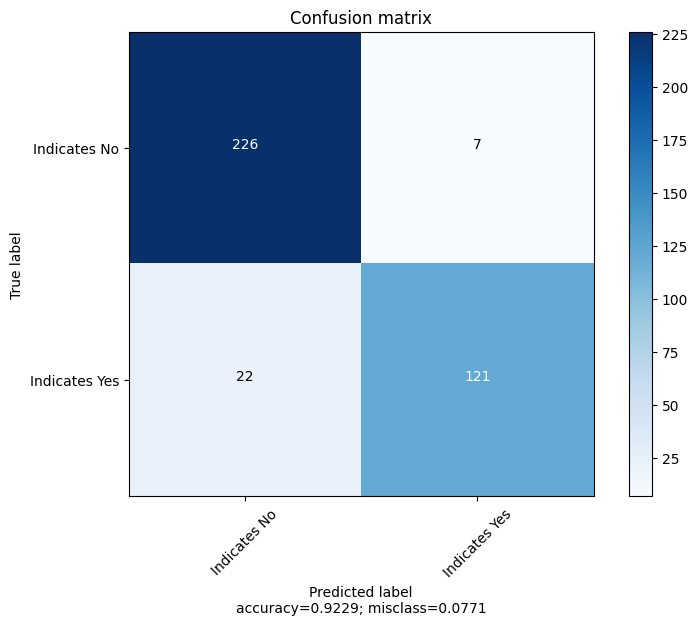

In [ ]:
# Main pipeline for fitting.
model_XGB = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_XGB.fit(X_train, y_train)
print("Training is success!")
y_pred = model_XGB.predict_proba(X_test)
predicted = model_XGB.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report XGBoost Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Indicates No","Indicates Yes"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

models.loc['ROC AUC','XGBClassfier'] = auc
models.loc['KS','XGBClassfier'] = ks

K-fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model_XGB.fit(X_train_fold, y_train_fold)
    y_pred = model_XGB.predict_proba(X_val_fold)[:, 1]

    score = roc_auc_score(y_val_fold, y_pred)
    cv_scores.append(score)

print(f'CV Scores: {cv_scores}')
print(f'Mean AUC: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')

CV Scores: [0.9477397602397603, 0.9767958219970604, 0.9688486174035307, 0.9744888329663416, 0.9528468071720667]
Mean AUC: 0.9641 ± 0.0117


## RandomForestClassifier

Training is success!
ROC AUC: 0.9260
KS: 0.7811 (p-value: 2.658e-54)
Classification report RandomForestClassifier : 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       233
           1       0.95      0.80      0.87       143

    accuracy                           0.91       376
   macro avg       0.92      0.89      0.90       376
weighted avg       0.91      0.91      0.91       376



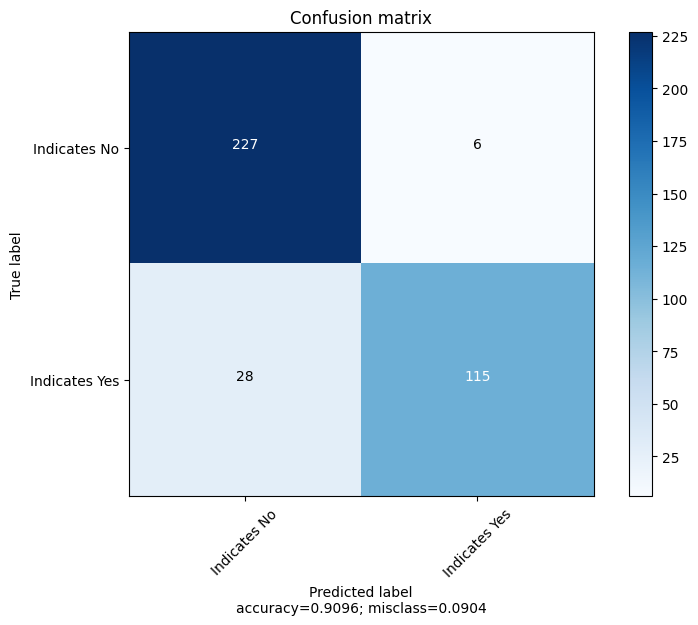

In [ ]:
# Main pipeline for fitting.
model_rf = RandomForestClassifier(max_depth= 20)
model_rf.fit(X_train, y_train)
print("Training is success!")
y_pred = model_rf.predict_proba(X_test)
predicted = model_rf.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report RandomForestClassifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Indicates No","Indicates Yes"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

models.loc['ROC AUC','RandomForestClassifier'] = auc
models.loc['KS','RandomForestClassifier'] = ks

Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='roc_auc')

# Print the CV scores
print("Cross-Validation AUC Scores:", cv_scores)
print("Mean CV AUC Score:", cv_scores.mean())

# Save the CV AUC score in your models dataframe
models.loc['CV AUC','RandomForestClassifier'] = cv_scores.mean()


Cross-Validation AUC Scores: [0.95377797 0.95301333 0.95799132 0.97512711 0.95332999]
Mean CV AUC Score: 0.9586479436985407


##Decision Tree Classifier


Training is success!
ROC AUC: 0.8350
KS: 0.6700 (p-value: 2.064e-38)
Classification report DecisionTreeClassifier : 
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       233
           1       0.80      0.79      0.80       143

    accuracy                           0.85       376
   macro avg       0.84      0.84      0.84       376
weighted avg       0.85      0.85      0.85       376



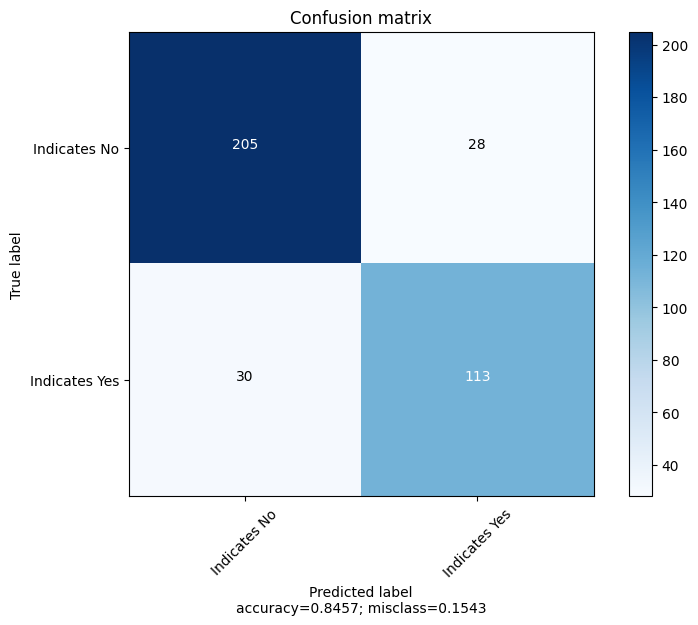

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(random_state=20)
dt_model.fit(X_train, y_train)
print("Training is success!")
y_pred_proba = dt_model.predict_proba(X_test)
y_pred = dt_model.predict(X_test)

# Print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred_proba)
matrix = classification_report(y_test, y_pred)
print('Classification report DecisionTreeClassifier : \n', matrix)
cm = confusion_matrix(y_test, y_pred)
target_names = ["Indicates No","Indicates Yes"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False)

models.loc['ROC AUC','DecisionTreesClassifier'] = auc
models.loc['KS','DecisionTreesClassifier'] = ks

Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='roc_auc')

# Print the CV scores
print("Cross-Validation AUC Scores for DecisionTreeClassifier:", cv_scores)
print("Mean CV AUC Score:", cv_scores.mean())

# Save the CV AUC score in your models dataframe
models.loc['CV AUC', 'DecisionTreeClassifier'] = cv_scores.mean()


Cross-Validation AUC Scores for DecisionTreeClassifier: [0.84636872 0.85195531 0.89944134 0.91320382 0.86552947]
Mean CV AUC Score: 0.8752997300859958


(0.8, 1.0)

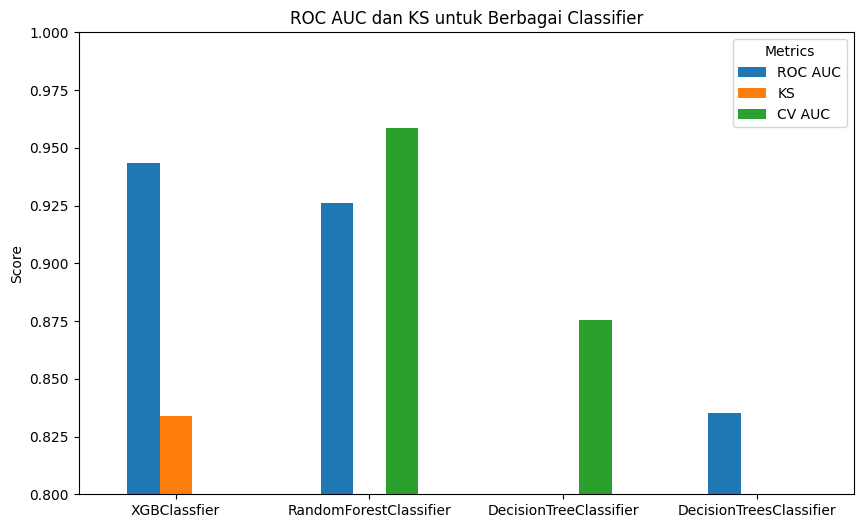

In [ ]:
# Membuat barplot
models.T.plot(kind='bar', figsize=(10, 6))

# Menambahkan judul dan label
plt.title('ROC AUC dan KS untuk Berbagai Classifier')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.ylim(0.8, 1.0)

### Top 10 Features in XGBoost

<Figure size 1000x600 with 0 Axes>

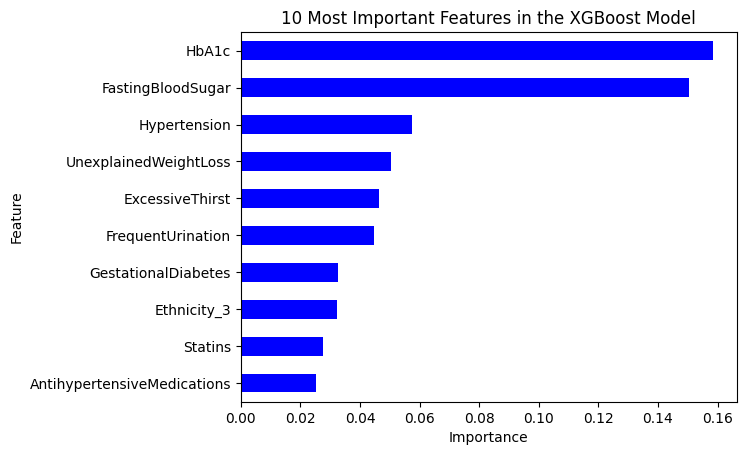

In [ ]:
# Extract the features and importance of the XGBoost model
feature_importances = pd.DataFrame()
feature_importances['feature'] = X_train.columns
feature_importances['importance'] = model_XGB.feature_importances_

# Visualization of the 10 most important features
plt.figure(figsize=(10, 6))
plot = feature_importances.sort_values('importance', ascending=False).head(10).plot.barh(color='blue', legend=None)
plot.set_yticklabels(feature_importances.sort_values('importance', ascending=False).head(10).feature)
plt.title('10 Most Important Features in the XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()
